https://www.kaggle.com/code/josephburton06/telco-churn-predictor

https://www.datacamp.com/tutorial/decision-tree-classification-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('../data/clean_political_social_media.csv')
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,85,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,136,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,139,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,110,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,128,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


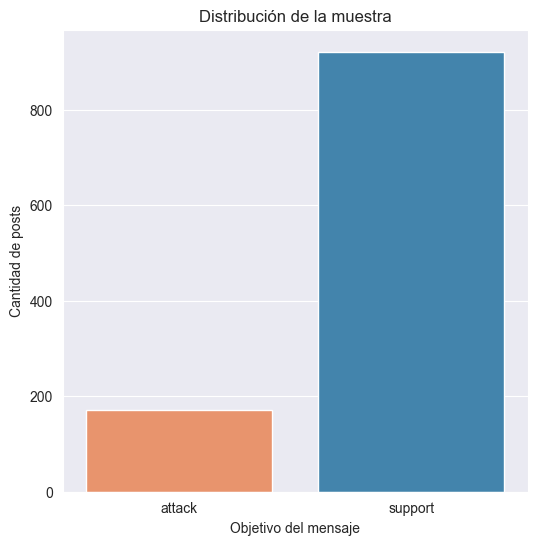

Porcentajes de posts de apoyo en la muestra: 84.26349496797805
Porcentajes de posts de ataque en la muestra: 15.736505032021958


In [3]:
rcParams['figure.figsize'] = 6,6
paleta = ["#fc8d59","#3288bd"]

df['message'].value_counts()
sns.countplot(x='message', data=df, palette=paleta)
plt.xlabel("Objetivo del mensaje")
plt.ylabel("Cantidad de posts")
plt.title("Distribución de la muestra")
plt.show()



attack = len(df[df['message']=='attack'])
support = len(df[df['message']=='support'])
ataque_porciento =( attack / (attack + support) * 100)
apoyo_porciento= (support / (attack + support) * 100)
print('Porcentajes de posts de apoyo en la muestra:', apoyo_porciento)
print('Porcentajes de posts de ataque en la muestra:', ataque_porciento)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unit_id              1093 non-null   int64 
 1   audience             1093 non-null   object
 2   bias                 1093 non-null   object
 3   message              1093 non-null   object
 4   source               1093 non-null   object
 5   cantidad_caracteres  1093 non-null   int64 
 6   usuario              1093 non-null   object
 7   cargo                1093 non-null   object
 8   estado               1093 non-null   object
 9   language_name        1093 non-null   object
 10  cantidad_arrobas     1093 non-null   int64 
 11  cantidad_hashtag     1093 non-null   int64 
 12  tiene_obama          1093 non-null   int64 
 13  tiene_obamacare      1093 non-null   int64 
 14  tiene_costs          1093 non-null   int64 
 15  tiene_venezuela      1093 non-null   int64 
 16  tiene_

In [5]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['unit_id', 'cantidad_caracteres', 'cantidad_arrobas',
       'cantidad_hashtag', 'tiene_obama', 'tiene_obamacare', 'tiene_costs',
       'tiene_venezuela', 'tiene_demandar', 'tiene_remember', 'tiene_stuck',
       'tiene_higher', 'tiene_spawning', 'tiene_please', 'tiene_join',
       'tiene_great', 'tiene_vote', 'tiene_share', 'tiene_applaud',
       'tiene_clinton'],
      dtype='object')

# 1- Escalado

## Cantidad de caracteres

<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

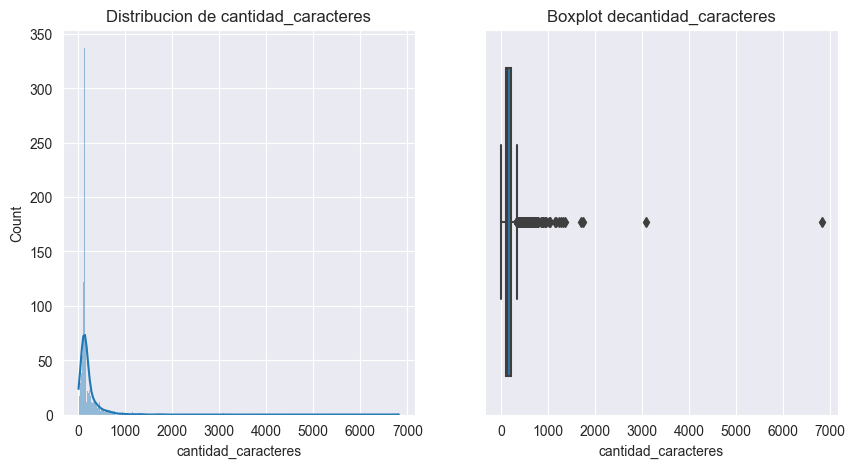

In [6]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Podemos obervar, que pareceria ser una distribucion normal, pero con outliers. Po rlo tanto esclaamos con robusto

In [7]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['cantidad_caracteres'] = rb_scaler.fit_transform(df[['cantidad_caracteres']])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

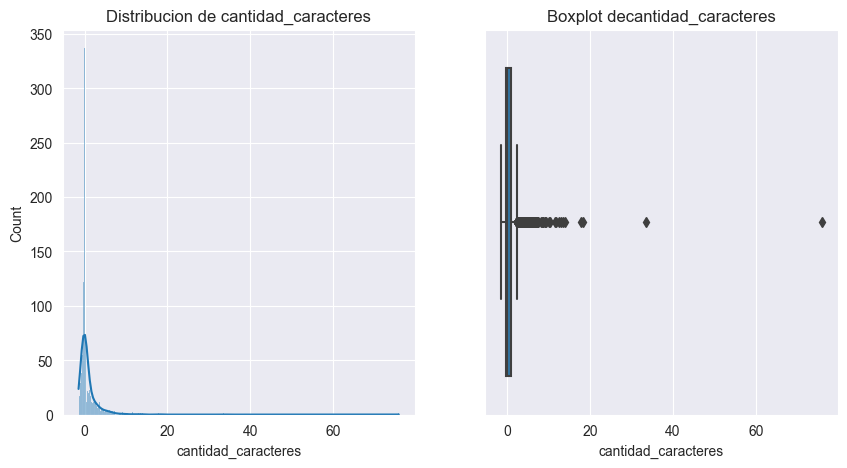

In [8]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

## Cantidad arrobas

<AxesSubplot: title={'center': 'Boxplot decantidad_arrobas'}, xlabel='cantidad_arrobas'>

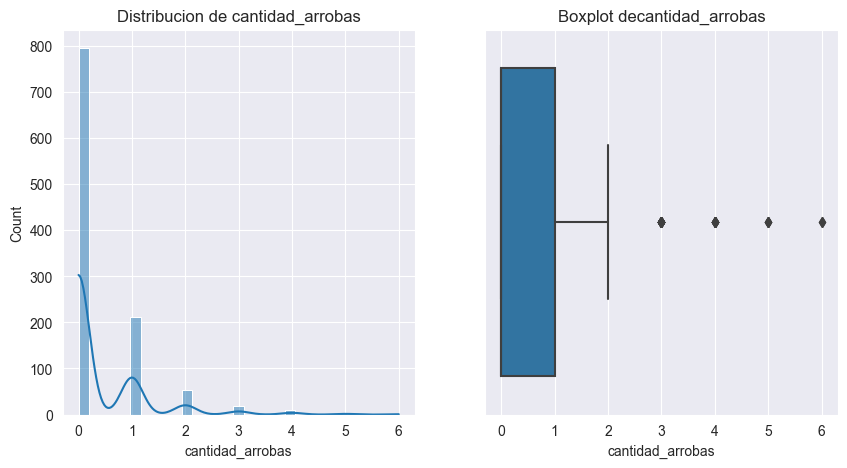

In [9]:
variable = 'cantidad_arrobas'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [10]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_arrobas']= minmaxscaler.fit_transform(df[['cantidad_arrobas']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


## Cantidad hashtag

<AxesSubplot: title={'center': 'Boxplot decantidad_hashtag'}, xlabel='cantidad_hashtag'>

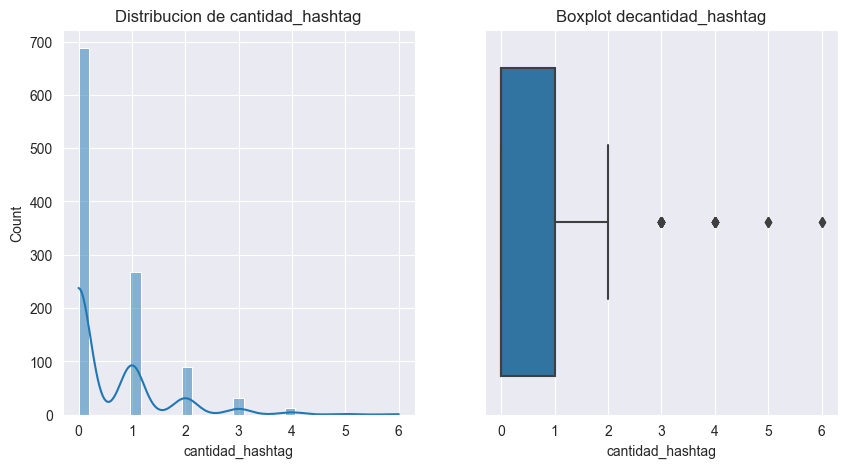

In [11]:
variable = 'cantidad_hashtag'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [12]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_hashtag']= minmaxscaler.fit_transform(df[['cantidad_hashtag']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


## Tiene obamacare

<AxesSubplot: title={'center': 'Boxplot detiene_obamacare'}, xlabel='tiene_obamacare'>

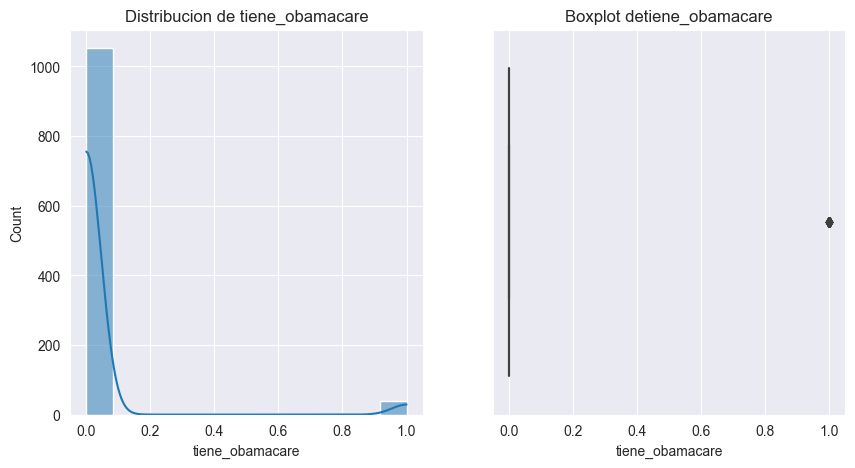

In [13]:
variable = 'tiene_obamacare'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

?????

## Tiene costs

<AxesSubplot: title={'center': 'Boxplot detiene_costs'}, xlabel='tiene_costs'>

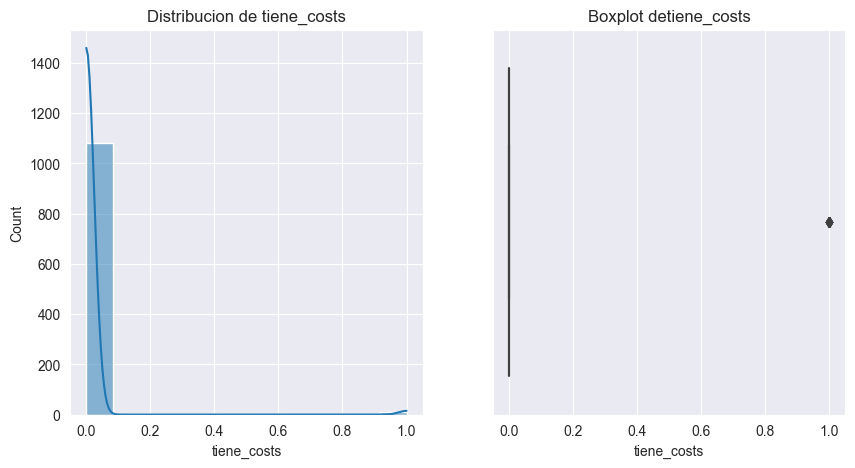

In [14]:
variable = 'tiene_costs'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_venezuela'}, xlabel='tiene_venezuela'>

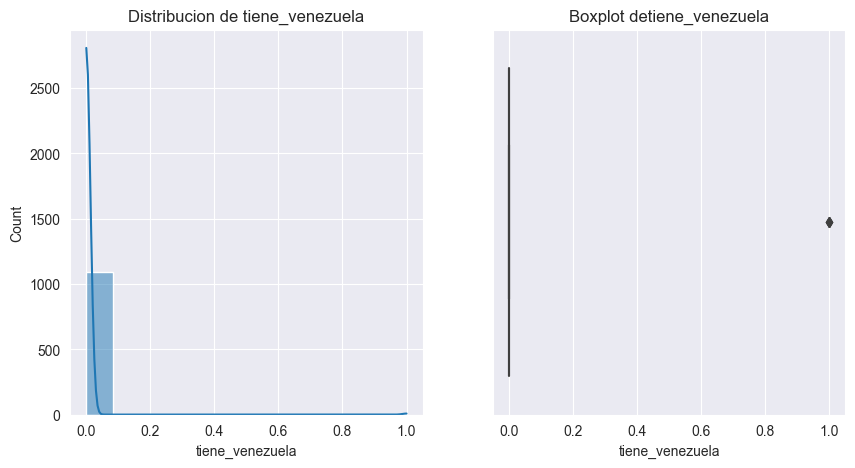

In [15]:
variable = 'tiene_venezuela'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_costs'}, xlabel='tiene_costs'>

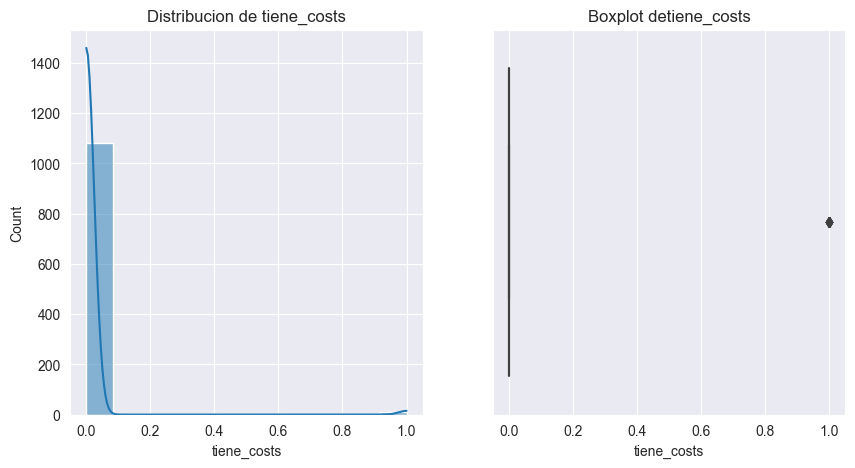

In [16]:
variable = 'tiene_costs'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_remember'}, xlabel='tiene_remember'>

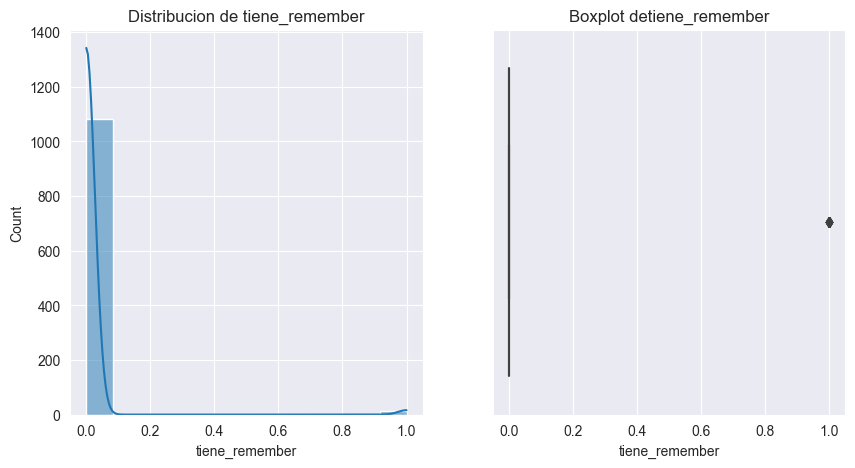

In [17]:
variable = 'tiene_remember'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_stuck'}, xlabel='tiene_stuck'>

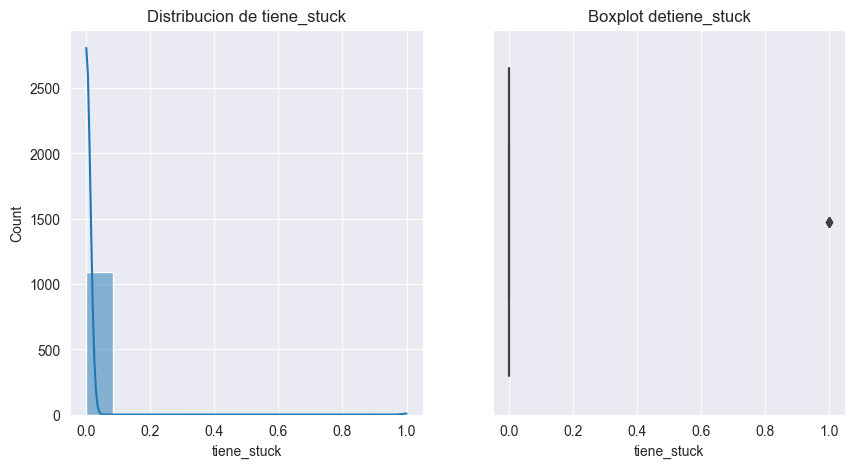

In [18]:
variable = 'tiene_stuck'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_higher'}, xlabel='tiene_higher'>

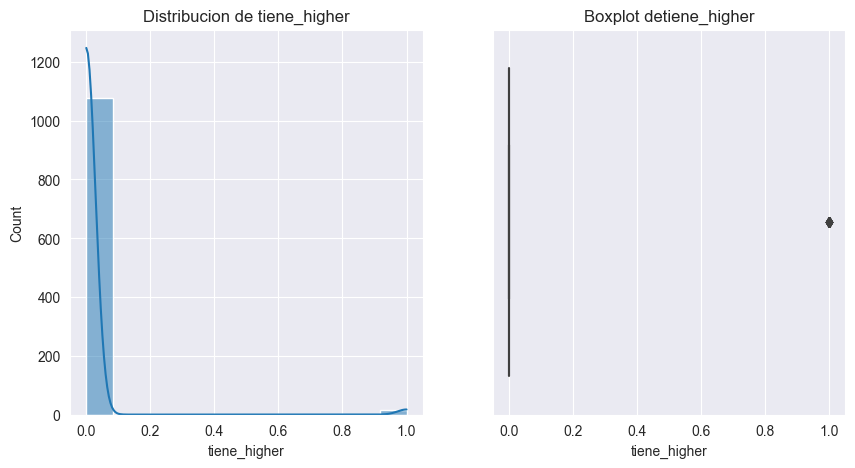

In [19]:
variable = 'tiene_higher'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_spawning'}, xlabel='tiene_spawning'>

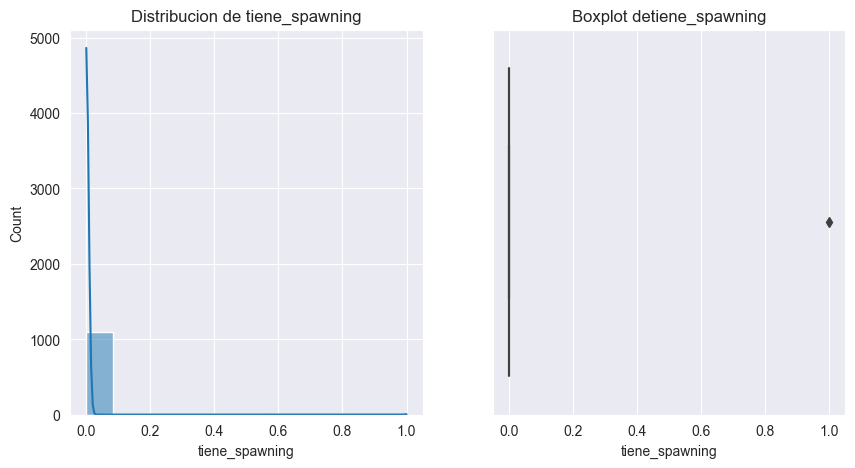

In [20]:
variable = 'tiene_spawning'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_please'}, xlabel='tiene_please'>

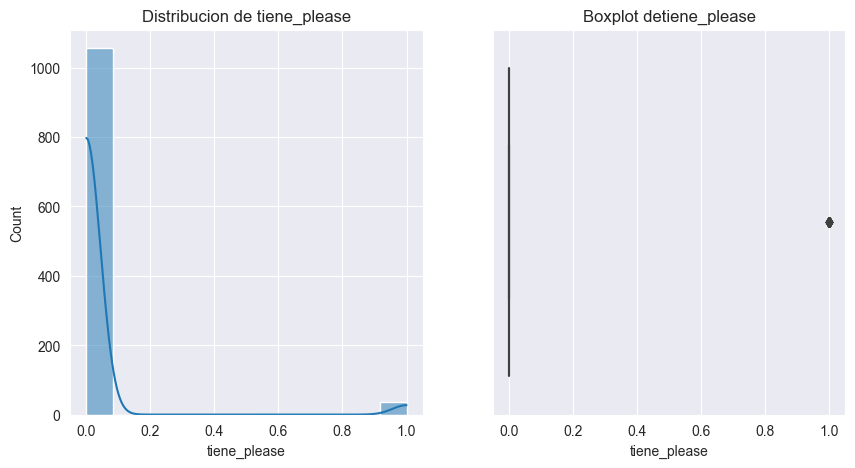

In [21]:
variable = 'tiene_please'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_join'}, xlabel='tiene_join'>

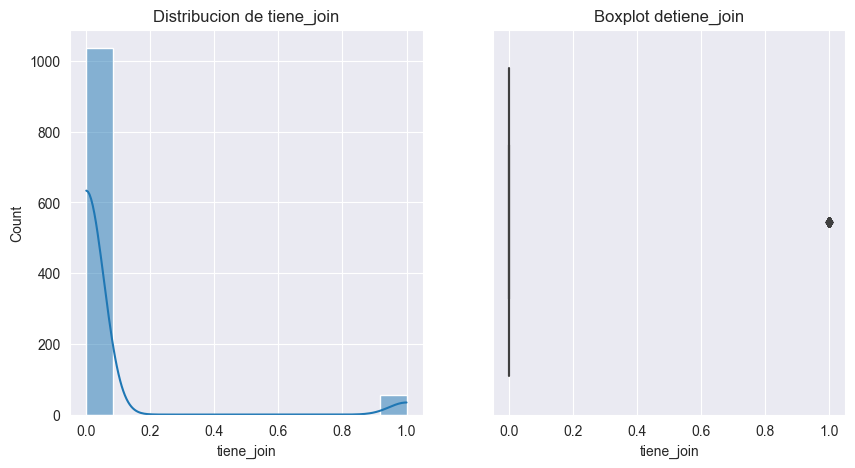

In [22]:
variable = 'tiene_join'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_great'}, xlabel='tiene_great'>

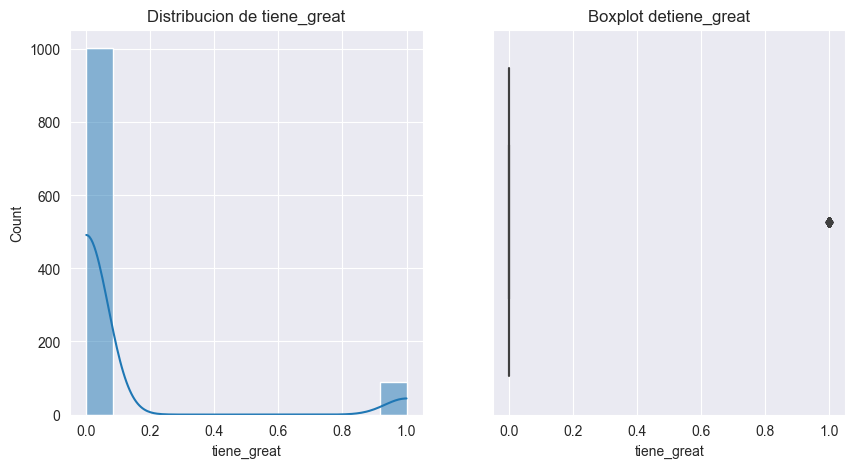

In [23]:
variable = 'tiene_great'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_vote'}, xlabel='tiene_vote'>

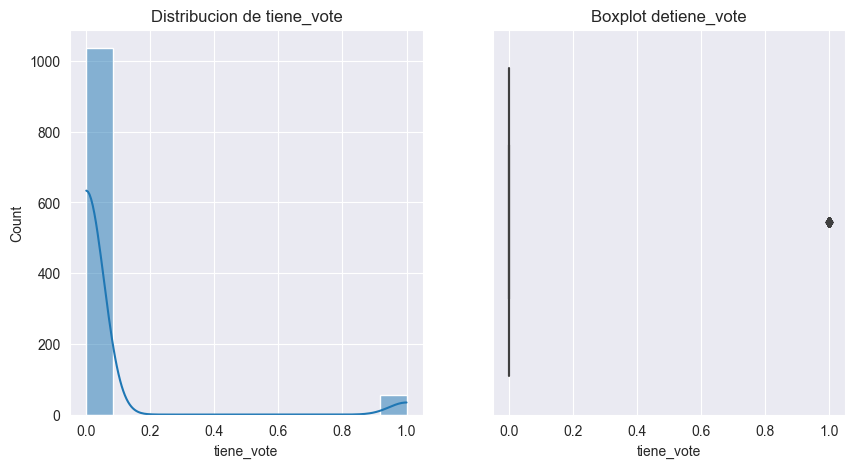

In [24]:
variable = 'tiene_vote'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_share'}, xlabel='tiene_share'>

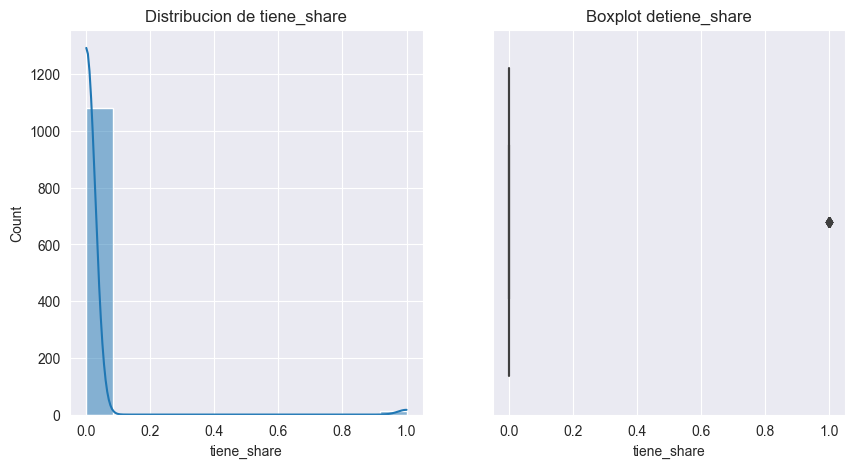

In [25]:
variable = 'tiene_share'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_applaud'}, xlabel='tiene_applaud'>

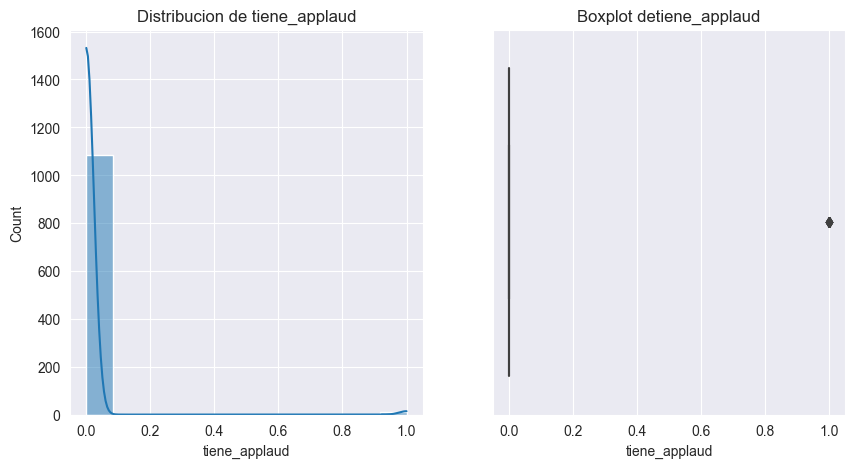

In [26]:
variable = 'tiene_applaud'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

<AxesSubplot: title={'center': 'Boxplot detiene_clinton'}, xlabel='tiene_clinton'>

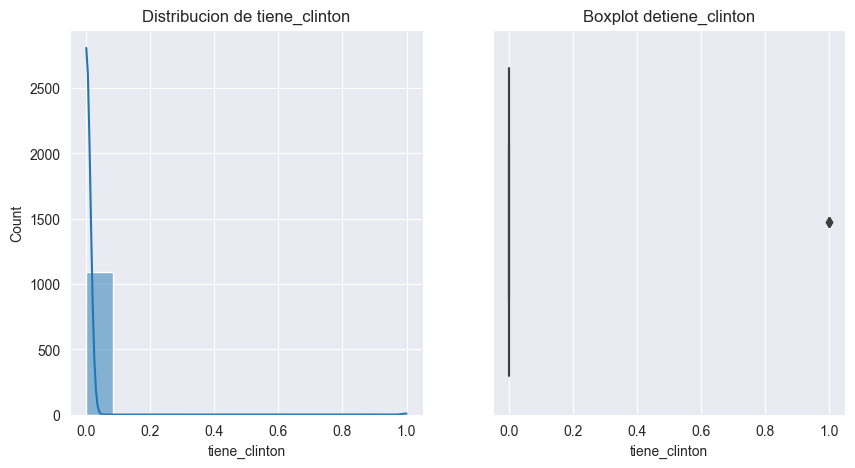

In [27]:
variable = 'tiene_clinton'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

# Encoding de vairbales categroicas

In [43]:
print(f"Los valores unicos de audience son {df.audience.unique()}")
print(f"Los valores unicos de bias son {df.bias.unique()}")
print(f"Los valores unicos de source son {df.source.unique()}")
print(f"Los valores unicos de cargo son {df.cargo.unique()}")
print(f"Los valores unicos de estado son {df.estado.unique()}")
print(f"Los valores unicos de language son {df.language_name.unique()}")

Los valores unicos de audience son ['national' 'constituency']
Los valores unicos de bias son ['partisan' 'neutral']
Los valores unicos de source son ['twitter' 'facebook']
Los valores unicos de cargo son ['Senator' 'Representative']
Los valores unicos de estado son ['Kentucky' 'Oregon' 'Maryland' 'Illinois' 'Connecticut' 'Virginia'
 'New York' 'Idaho' 'West Virginia' 'Louisiana' 'Florida' 'North Dakota'
 'Colorado' 'Georgia' 'Missouri' 'Kansas' 'North Carolina' 'Massachusetts'
 'Minnesota' 'Pennsylvania' 'California' 'Washington' 'Wisconsin'
 'Michigan' 'Ohio' 'Nevada' 'Indiana' 'Texas' 'Rhode Island' 'Arkansas'
 'South Carolina' 'Arizona' 'Iowa' 'Maine' 'Tennessee' 'New Jersey'
 'New Hampshire' 'Mississippi' 'Utah' 'Delaware' 'New Mexico' 'Oklahoma'
 'South Dakota' 'Nebraska' 'Alabama' 'Vermont' 'District of Columbia'
 'Hawaii' 'Montana' 'Guam' 'Wyoming' 'Alaska' 'Puerto Rico']
Los valores unicos de language son ['English' 'Spanish , Castilian' 'Desconocido']


In [44]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['audience'] = binary_encoder.fit_transform(df[['audience']])
df['bias'] = binary_encoder.fit_transform(df[['bias']])
df['source'] = binary_encoder.fit_transform(df[['source']])
df['cargo'] = binary_encoder.fit_transform(df[['cargo']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,1.0,1.0,attack,1.0,-0.602273,Mitch McConnell,1.0,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,1.0,0.0,support,1.0,-0.022727,Kurt Schrader,0.0,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,1.0,1.0,support,1.0,0.011364,Steny Hoyer,0.0,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,1.0,1.0,attack,1.0,-0.318182,Adam Kinzinger,0.0,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,1.0,0.0,support,1.0,-0.113636,Elizabeth Esty,0.0,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

language_ohe.fit(df[['language_name']]) # Fit one hot encoder

language_ohe.categories_

[array(['Desconocido', 'English', 'Spanish , Castilian'], dtype=object)]

In [46]:
df['Desconocido'],df['English'],df['Spanish'],df['Castilian']  = language_ohe.fit_transform(df[['language_name']]).T

df.drop(columns=['language_name'], inplace = True)

df.head()

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['enginetype']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['enginetype']])

df[ohe.get_feature_names_out()] = enginetype_encoded

df.drop(columns='enginetype', inplace=True)

df
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()

base_model_score


# Arbol

In [ ]:
from sklearn.model_selection import train_test_split

In [50]:
X =df.drop(columns=['message'])
y = df['message']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123).fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)
print('Accuracy of Decision Tree classifier on training set: {:.6f}'
     .format(clf.score(X_train, y_train)))

In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'Bill Shuster'

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X)
features

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Encoding de vairbales categroicas

In [31]:
categoricas = df.select_dtypes(exclude=['int64']).columns
categoricas

Index(['audience', 'bias', 'message', 'source', 'cantidad_caracteres',
       'usuario', 'cargo', 'estado', 'language_name', 'cantidad_arrobas',
       'cantidad_hashtag'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['enginetype']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['enginetype']])

df[ohe.get_feature_names_out()] = enginetype_encoded


df.drop(columns='enginetype', inplace = True)

df

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()

base_model_score